In [1]:
import cv2
import numpy as np

In [5]:
img = cv2.imread('sample/home.jpg',0)
hist = cv2.calcHist([img],[0],None,[256],[0,256])

In [6]:
hist

array([[  1.63000000e+02],
       [  3.50000000e+01],
       [  3.00000000e+01],
       [  4.70000000e+01],
       [  6.00000000e+01],
       [  5.80000000e+01],
       [  5.70000000e+01],
       [  6.20000000e+01],
       [  6.00000000e+01],
       [  6.40000000e+01],
       [  7.50000000e+01],
       [  9.50000000e+01],
       [  7.80000000e+01],
       [  1.97000000e+02],
       [  1.10000000e+02],
       [  1.25000000e+02],
       [  1.06000000e+02],
       [  1.16000000e+02],
       [  1.06000000e+02],
       [  1.30000000e+02],
       [  1.12000000e+02],
       [  1.01000000e+02],
       [  1.10000000e+02],
       [  1.25000000e+02],
       [  9.30000000e+01],
       [  1.28000000e+02],
       [  1.19000000e+02],
       [  1.17000000e+02],
       [  1.21000000e+02],
       [  1.39000000e+02],
       [  1.27000000e+02],
       [  1.29000000e+02],
       [  1.55000000e+02],
       [  1.39000000e+02],
       [  1.43000000e+02],
       [  1.48000000e+02],
       [  1.54000000e+02],
 

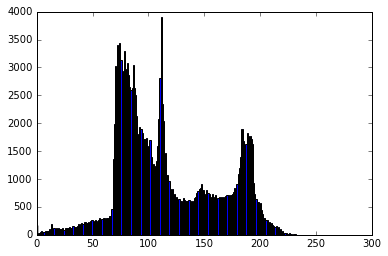

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('sample/home.jpg',0)
plt.hist(img.ravel(),256,[0,256]); plt.show()

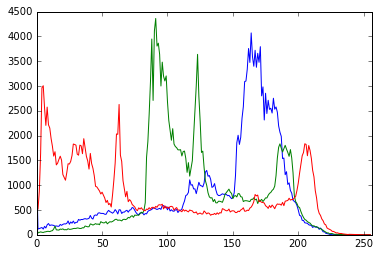

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('sample/home.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

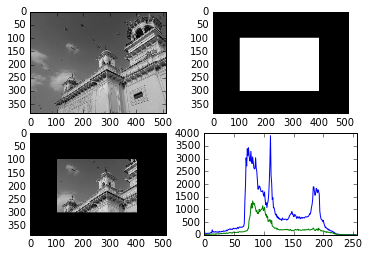

In [9]:
img = cv2.imread('sample/home.jpg',0)

# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)

# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])

plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])

plt.show()

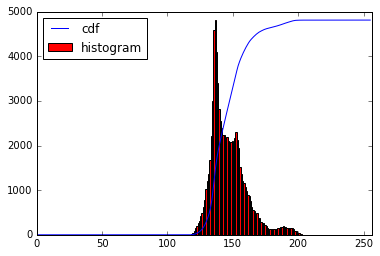

In [22]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('sample/wiki.jpg',0)

hist,bins = np.histogram(img.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [23]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')
img2 = cdf[img]
cv2.imwrite('sample/wiki1.jpg', img2)
cv2.imshow('img', img)
cv2.imshow('img1', img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

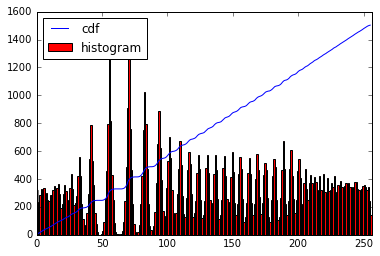

In [24]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('sample/wiki1.jpg',0)

hist,bins = np.histogram(img.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [25]:
img = cv2.imread('sample/wiki.jpg',0)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
cv2.imwrite('sample/wiki2.jpg',res)

True

In [26]:
cv2.imshow('img', img)
cv2.imshow('img1', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [42]:
import numpy as np
import cv2

img = cv2.imread('sample/tsukuba.png', 0)


# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)

cv2.imwrite('sample/clahe.jpg',cl1)

cl2 = cv2.imread('sample/clahe.jpg')

cv2.imshow('image', cl2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [43]:
import cv2
import numpy as np

img = cv2.imread('sample/home.jpg')
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

hist = cv2.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])

In [44]:
hist

array([[ 207.,    0.,    0., ...,    0.,    0.,  106.],
       [   0.,    0.,    0., ...,    0.,    0.,    1.],
       [   0.,    0.,    0., ...,    0.,    0.,    8.],
       ..., 
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.]], dtype=float32)

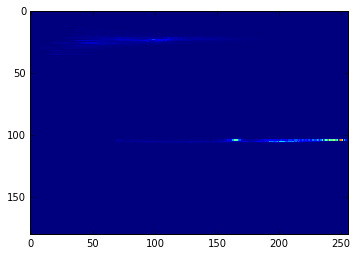

In [47]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('sample/home.jpg')
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
hist = cv2.calcHist( [hsv], [0, 1], None, [180, 256], [0, 180, 0, 256] )

plt.imshow(hist,interpolation = 'nearest')
plt.show()